In [1]:
# Example Usage for HPVsim - Human Papillomavirus Sim Model
# Custom Parameters and Interventions Added
# Credit BMGF Institute for Disease Modeling (IDM)
# Github Repo - https://github.com/institutefordiseasemodeling/hpvsim
# Code Source - https://docs.idmod.org/projects/hpvsim/en/latest/tutorials/tut_intro.html#Full-usage-example

In [2]:
#Import Library
import hpvsim as hpv

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


HPVsim 2.0.0 (2023-11-29) — © 2023 by IDM


In [3]:
# Custom Vaccination Intervention
def custom_vx(sim):
    if sim.yearvec[sim.t] == 2000:
        target_group = (sim.people.age>9) * (sim.people.age<14)
        sim.people.peak_imm[0, target_group] = 1

In [4]:
# Add Custom Simulaton Parameters
pars = dict(
    location = 'tanzania', # Use population characteristics for Japan
    n_agents = 10e3, # Have 50,000 people total in the population
    start = 1980, # Start the simulation in 1980
    n_years = 50, # Run the simulation for 50 years
    burnin = 10, # Discard the first 20 years as burnin period
    verbose = 0, # Do not print any output
)

In [5]:
# Running with multisims
s1 = hpv.Sim(pars, label='Default')
s2 = hpv.Sim(pars, interventions=custom_vx, label='Custom vaccination')
msim = hpv.MultiSim([s1, s2])
msim.run()

Loading location-specific demographic data for "tanzania"
Loading location-specific demographic data for "tanzania"


MultiSim("Default"; n_sims: 2; base: Sim("Default"; 1980 to 2030; pop: 10000 default; epi: not run))

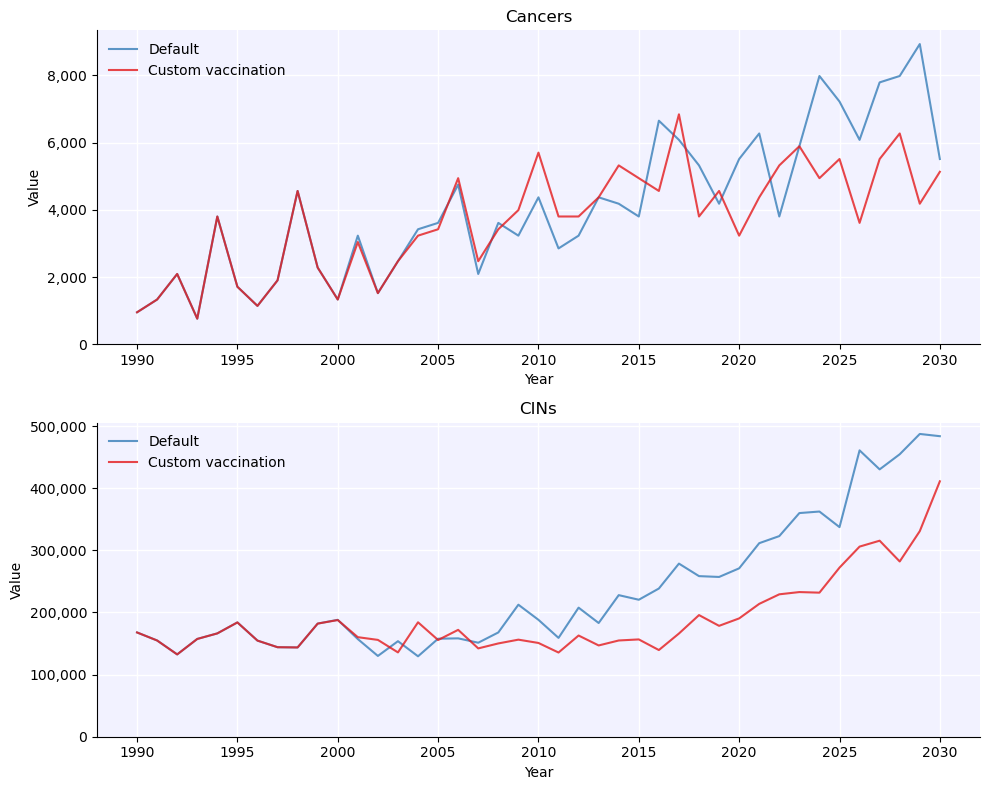

In [6]:
# Plot Simulation Run
fig = msim.plot(['cancers', 'cins'])